In [ ]:
import pandas as pd

In [ ]:
base = pd.read_excel('/content/sample_data/dados_asset_bills.xlsx', sheet_name = 'Planilha1')

# ANALISE DE DUPLICATAS POR ENDOSSER

## ANALISE DUPLICATAS FINALIZADAS

Baseado na hipótese de quanto mais histórico de duplicatas finalizadas um endossante tem, maior é a confiabilidade lhe empregada, o seguinte estudo apresenta uma proposta de faixa de score de pontuação:

In [ ]:
finalizadas = base[base['state'] == 'finished']

In [ ]:
finalizadas_por_fornecedor = finalizadas.groupby(by=["NOME_ENDOSSER"]).size()

In [ ]:
finalizadas_por_fornecedor = finalizadas_por_fornecedor.sort_values(ascending=True)

In [ ]:
finalizadas_por_fornecedor.describe()

,0
count,88.000000
mean,5.340909
std,9.083124
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,68.000000


<Axes: >

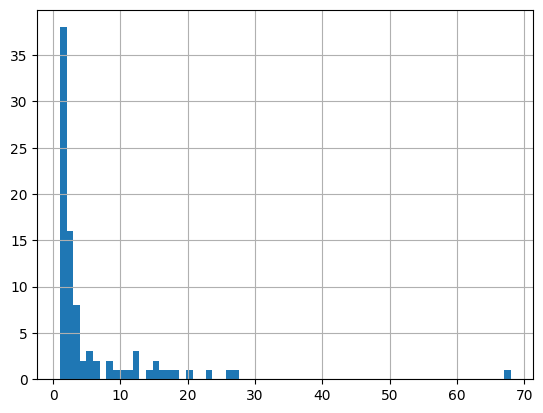

In [ ]:
finalizadas_por_fornecedor.hist(bins=68)

- Quantidade de Fornecedores com duplicatas finalizadas: 88
- Média por Fornecedor: 5.340909
- Desvio Padrão: 9.083124
- 25%: 1.000000
- 50%: 2.000000
- 75%: 5.000000

A quantidade duplicatas finalizadas por fornecedor é importante pois permite com que possamos através dela mensurar quantos adiantamentos foram concluídos. Um histórico pequeno de duplicatas finalizadas pode determinar um nivel de confiabilidade baixo, que pode ser devido a uma falha de compromisso com os pagamentos ou por primeiras ocorrências de duplicatas de um fornecedor.
<br>
<br>
Com a análise é possível visualizar que:
- 75% dos fornecedores possuem de 1 à 5 duplicatas finalizadas.
- A quantidade de duplicatas finalizadas dos 25% restantes podem chegar a 1173% acima da média.
- A presença de outliers distorcem a visão dos 25% restantes, visto que a amplitude é de 62


Dado que a maioria dos fornecedores se encontram na faixa de 1 até 5 duplicatas finalizadas, consideremos o percentil de 75% para a primeira faixa de pontuação do *score*. <br>


Para os 25% restantes, os cálculos serão refeitos desconsiderando os valores pentencentes a primeira faixa de score.



In [ ]:
finalizadas_por_fornecedor.loc[lambda x : x > finalizadas_por_fornecedor.quantile([0.75]).values[0]].sort_values(ascending=True).describe()

,0
count,21.000000
mean,16.809524
std,13.178084
min,6.000000
25%,10.000000
50%,14.000000
75%,18.000000
max,68.000000


Comparando esses resultado com a análise anterior, há uma desregularidade maior dos dados dentro do segundo conjunto.

In [ ]:
segunda_faixa = finalizadas_por_fornecedor.loc[lambda x : x > finalizadas_por_fornecedor.quantile([0.75]).values[0]].sort_values(ascending=True)

<Axes: >

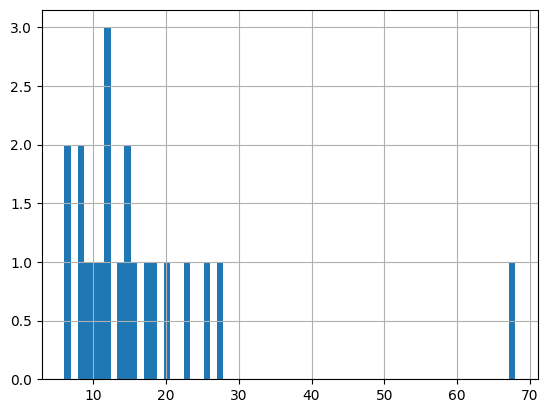

In [ ]:
segunda_faixa.hist(bins=68)

O fator de desvio deve-se a um único fornecedor com quantidade de duplicatas elevada, elevando a média e assim trazendo uma visão desvio não proporcional a maior parte do conjunto conjunto. Também, a frequencia de fornecedores com quantidade de duplicatas finalizadas acima de 18 e abaixo de 30 é menor do que na faixa de fornecedores com quantidade de duplicatas de 6 à 18.


Considerando que 75% do conjunto está na faixa de 6 a 18 duplicatas finalizadas, os próximos cálculos desconsiderarão momentaneamente valores acima dessa faixa


In [ ]:
segunda_faixa = segunda_faixa.loc[lambda x : x <= segunda_faixa.quantile([.75]).values[0]].sort_values(ascending=True)

In [ ]:
segunda_faixa.describe()

,0
count,16.000000
mean,11.812500
std,3.798574
min,6.000000
25%,8.750000
50%,12.000000
75%,15.000000
max,18.000000


<Axes: >

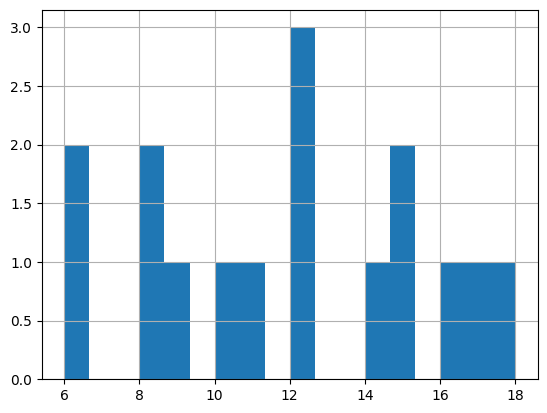

In [ ]:
segunda_faixa.hist(bins=18)

A variação dentro dessa faixa de valores é bem menor do que no conjunto anterior. Em uma hipótese, se considerassemos apenas o percentil de 75% desse conjunto e juntássemos os 25% restantes com a faixa de acima de 18 e menor que 30 em outro conjunto, os dados do outro conjunto criado teriam um desvio maior do que o desse segundo conjunto total que está sendo avaliado.

Descrição da hipótese:<br>
- c1 = 6-18 -> desvio padrão igual à 3,79
- c2 = 19-30 -> desvio padrão igual à 3,16
- ch1 = 6-15 -> desvio padrão igual à 3,09
- ch2 = 16-30 -> desvio padrão igual à 4,39

*Diferença entre conjuntos:*
  - c1 - c2 = 0,63
  - ch1 - ch2 = 1,3
<br>

*Legenda:*
- c1: Conjunto 1
- c2: Conjunto 2
- ch1: Conjunto hipótese 1
- ch2: Conjunto hipótese 2

<br>
Dado esse fatores, consideraremos:
<br>

- Primeira faixa do score: 1-5 duplicatas finalizadas.
- Segunda faixa do score: 6-18 duplicatas finalizadas.
- Terceira faixa do score: 19-30 duplicatas finalizadas.
- Quarta faixa do score: acima de 30 duplicatas finalizadas.


## ANÁLISE DO TOTAL DE DUPLICATAS

Baseado na hipótese de quanto mais histórico de duplicatas finalizadas de um endossante pelo seu total de duplicatas, maior é a confiabilidade lhe empregada, o seguinte estudo apresenta uma proposta de faixa de score de pontuação:

In [ ]:
base_total = base[['NOME_ENDOSSER','state']]

In [ ]:
base_total = base_total.groupby(['NOME_ENDOSSER', 'state']).size().reset_index(name='total')

In [ ]:
base_total = base_total.pivot(values = 'total', index = 'NOME_ENDOSSER', columns = 'state')

In [ ]:
base_total['finished'] = base_total['finished'].fillna(0)

In [ ]:
base_total['active'] = base_total['active'].fillna(0)

In [ ]:
base_total['canceled'] = base_total['canceled'].fillna(0)

In [ ]:
base_total

state,active,canceled,finished
NOME_ENDOSSER,,,
2001-08-01 00:00:00,1.0,0.0,0.0
LEAO NORDESTE INDUSTRIA E COMERCIO DE PLASTICOS LTDA,50.0,0.0,0.0
RAIADROGASIL S/A,7.0,2.0,2.0
Shopping São Paulo,1.0,0.0,0.0
027 SMP - IND. COMERCIO MOVEIS LTDA,12.0,0.0,0.0
...,...,...,...
testeFa,0.0,0.0,1.0
testeFabricio,2.0,0.0,0.0
testeFalha500,30.0,0.0,0.0


In [ ]:
base_total['perc'] = (base_total['finished']/base_total.sum(axis=1))*100

<Axes: >

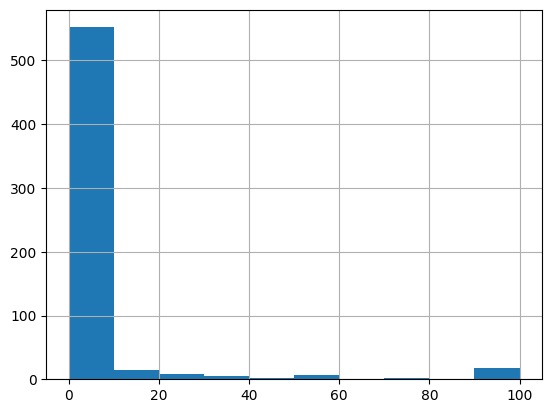

In [ ]:
base_total['perc'].hist()

In [ ]:
base_total = base_total.sort_values(by=['perc'])

In [ ]:
base_total.describe()

state,active,canceled,finished,perc
count,609.000000,609.000000,609.000000,609.000000
mean,225.420361,71.408867,0.771757,5.074625
std,4422.659613,1716.876230,3.916328,18.669845
min,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,0.000000,0.000000
75%,36.000000,0.000000,0.000000,0.000000
max,109148.000000,42370.000000,68.000000,100.000000


In [ ]:
base_total = base_total['perc']

In [ ]:
base_total.describe()

,perc
count,609.000000
mean,5.074625
std,18.669845
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


Perante a análise de duplicatas finalizadas por total de duplicatas, mais de 75% dos fornecedores não possuem duplicatas finalizadas. Com isso, não será adotado uma pontuação para esses fornecedores.

Os próximos cálculos desconsiderarão os fornecedores sem duplicatas finalizadas

In [ ]:
base_total = base_total.loc[lambda x : x > 0].sort_values(ascending=True)

In [ ]:
base_total.describe()

,perc
count,88.000000
mean,35.118714
std,36.995916
min,0.001980
25%,6.158088
50%,18.597951
75%,50.000000
max,100.000000


<Axes: >

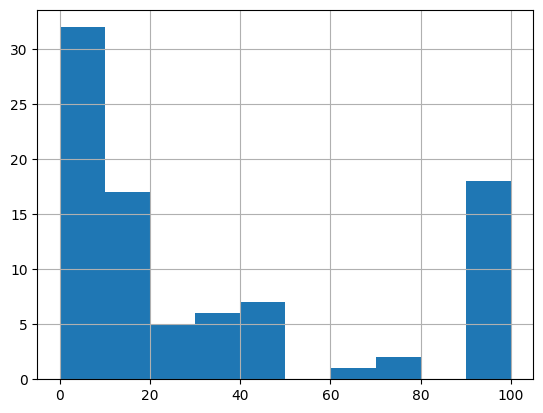

In [ ]:
base_total.hist()

Os dados do conjunto que estão com a porcentagem abaixo da mediana possuem uma dispersão menor do que os dados acima da mediana. Também os dados do conjunto pertencentes ao 3 quartil também estão menos dispersos do que os dados dos 25% restantes. Dado isso, segue uma comparação do desvio entre o 2º quartil e o 3º quartil.

In [ ]:
q50 = base_total.loc[lambda x : x <= base_total.quantile([.5]).values[0]].sort_values(ascending=True)

In [ ]:
q50.describe()

,perc
count,44.000000
mean,6.777852
std,5.417705
min,0.001980
25%,2.176629
50%,6.066176
75%,10.536398
max,18.181818


In [ ]:
q75 = base_total.loc[lambda x : x <= base_total.quantile([.75]).values[0]].sort_values(ascending=True)

In [ ]:
q75.describe()

,perc
count,67.000000
mean,16.094977
std,15.333024
min,0.001980
25%,3.181818
50%,11.111111
75%,23.303167
max,50.000000


ANALISAR IMPACTO PERCENTUAL